# Homework 2

The shooting method which bootstraps a boundary value problem solution by iterating over initial value problems. 

## 1. Quantum Mechanics On The Computer

The time-independent Schrödinger equation for a single particle in one spatial dimension:

\begin{equation}
-\frac{1}{2m}\frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)
\end{equation}

As a system of two first order ODEs:

\begin{equation}
\frac{d \phi(x)}{dx} = 2m(V(x)-E)\psi(x)
\end{equation}

\begin{equation}
\frac{d \psi(x)}{dx} = \phi(x)
\end{equation}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#RK4 Solver

def RK4_solver(psi_a,d_psi_a,a,b,V,E,m):
    """
    Function solving Schrodinger equation for wave function psi
    
    :param psi_a: float, initial value of psi
    :param d_psi_a: float, initial value of derivative of psi
    :param a: float,lower boundry
    :param b: float,upper boundary
    :param V: function, potential of Schrodinger equation
    :param E: float, energy eigenvalue
    :param m: float, mass
    """

    number_steps = 1000
    x_points = np.linspace(a,b,number_steps)
    phi_points = np.zeros(len(x_points))
    psi_points = np.zeros(len(x_points))
    h = (b-a)/number_steps #step size

    #initial values

    phi = d_psi_a
    psi = psi_a


    #iteration step 
    for i in range(0, len(x_points)):
        phi_points[i] = phi 
        psi_points[i] = psi
        x = x_points[i]

        k1_phi = 2*m *(V(x)- E)* psi
        k1_psi = phi

        k2_phi = 2*m *(V(x+h/2)- E)* (psi +h*k1_psi/2)
        k2_psi = phi + h*k1_phi/2
       
        k3_phi = 2*m *(V(x+h/2)- E)* (psi +h*k2_psi/2)
        k3_psi = phi + h*k2_phi/2
       
        k4_phi = 2*m *(V(x+h)- E)* (psi +h*k3_psi)
        k4_psi = phi + h*k3_phi

        phi += h * (k1_phi + 2*k2_phi +2*k3_phi + k4_phi)/6
        psi += h * (k1_psi + 2*k2_psi +2*k3_psi + k4_psi)/6
        
    return x_points,phi_points,psi_points

Free particle $V(x)=0$

In [4]:
def V1(x):
    return 0.0

In [5]:
m=1
E=1
psi_a = 0
d_psi_a =1
X,dP,P = RK4_solver(psi_a,d_psi_a,0,10,V1,E,m)

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/4019807337.py:3: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(X,P, label = "$\psi(x)$")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/4019807337.py:4: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(X,Y, label = "$sin(\sqrt{{2mE}}x)$")


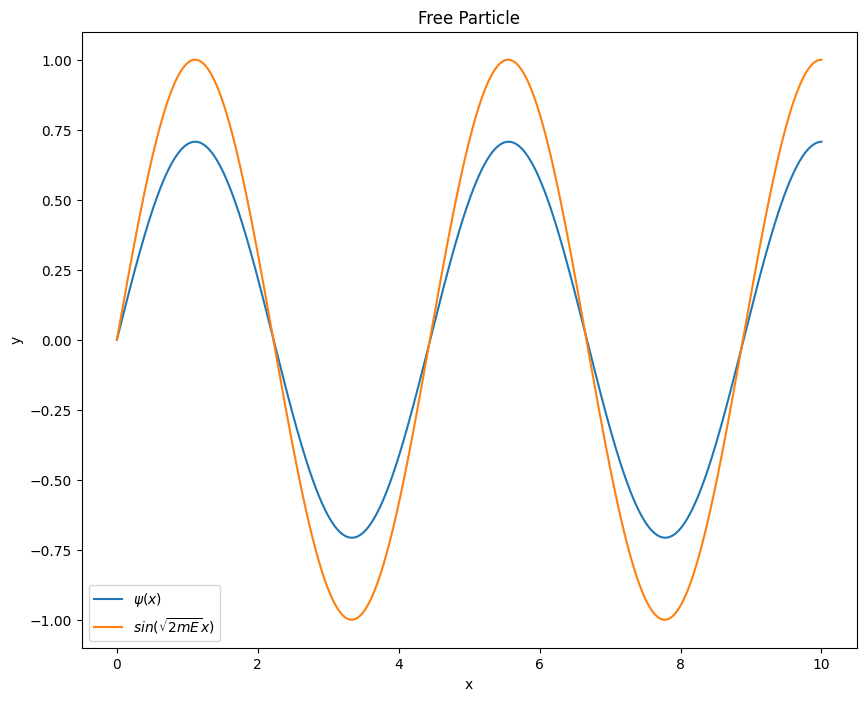

In [11]:
fig,ax = plt.subplots(figsize=(10, 8))
Y = np.sin(np.sqrt(2) * X)
ax.plot(X,P, label = "$\psi(x)$")
ax.plot(X,Y, label = "$sin(\sqrt{{2mE}}x)$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Free Particle")
ax.legend()
plt.savefig("free_particle.png")
plt.show()

Finding an energy that gives $\psi(10) \approx 0$.

Since $\psi(x) \propto \sin(\sqrt{2mE}x)$, for $m=1$, we need $\sin(\sqrt{2E}10) \propto 0$.

Therefore, $\sqrt{E} \propto \frac{\sqrt{2} \pi}{10}$, and $E = 2 \cdot \frac{\pi^2}{100}$

In [14]:
#Finding the energy that gives psi(10) = 0

m=1
E2=2*np.pi**2 /100
psi_a = 0
d_psi_a =1
X2,dP2,P2 = RK4_solver(psi_a,d_psi_a,0,10,V1,E2,m)


<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/3712913138.py:3: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(X2,P2, label = "$\psi(x), \psi(10)=0$")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/3712913138.py:4: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(X2,Y2, label = "$sin(\sqrt{{2mE}}x)$")


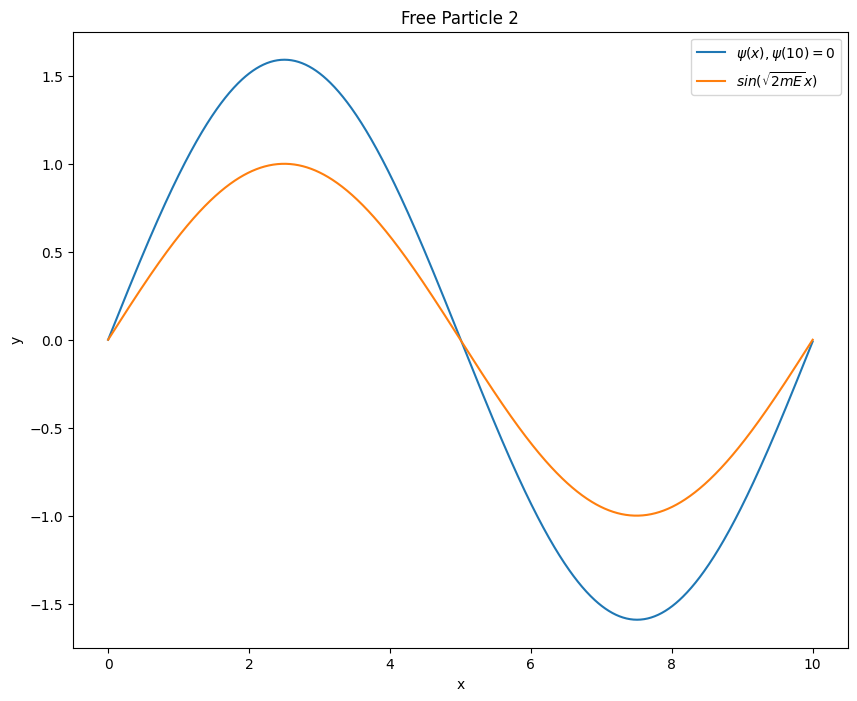

In [15]:
fig,ax = plt.subplots(figsize=(10, 8))
Y2 = np.sin(np.sqrt(2*E2) * X2)
ax.plot(X2,P2, label = "$\psi(x), \psi(10)=0$")
ax.plot(X2,Y2, label = "$sin(\sqrt{{2mE}}x)$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Free Particle 2")
ax.legend()
plt.savefig("free_particle_2.png")
plt.show()

Harmonic Oscillator $V(x)=m\omega^2 x^2/2 $

In [16]:
m = 1
w = 1
def V2(x):
    return m* w**2 * x**2/2

In [22]:
#Initial Trial for the plot
E_0 = w/2
a = 2
psi_a = 0
d_psi_a =1
X3,dP3,P3 = RK4_solver(psi_a,d_psi_a,-a,a,V2,E_0,m)

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\o'
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/3100265677.py:3: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(X3,P3, label = "$\psi(x)$")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/3100265677.py:4: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(X3,Y3, label = "$e^{{-m \omega x^2/2}}$")


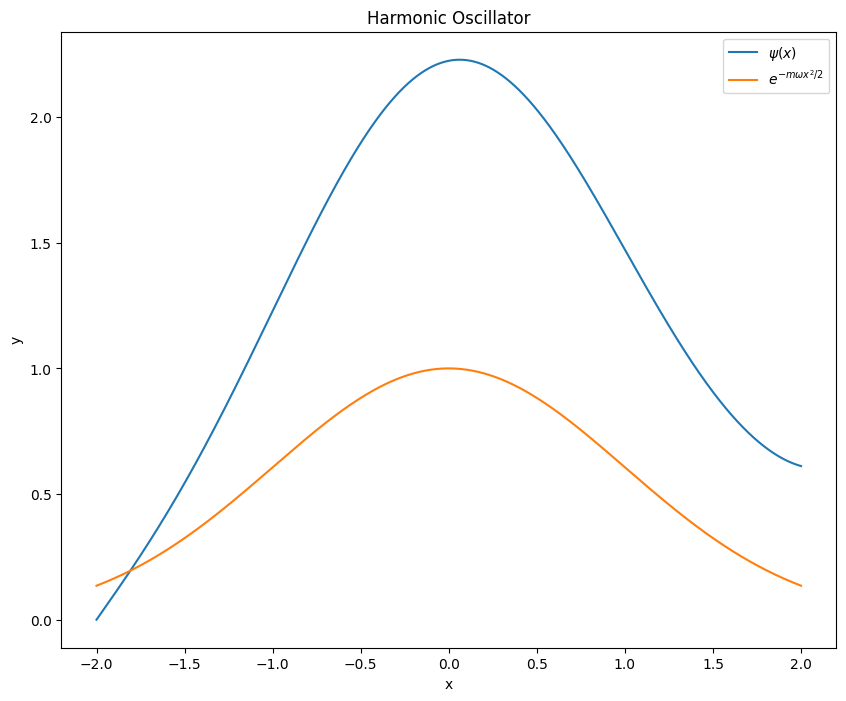

In [23]:
fig,ax = plt.subplots(figsize=(10, 8))
Y3 = np.e**(-m * w* X3**2 /2)
ax.plot(X3,P3, label = "$\psi(x)$")
ax.plot(X3,Y3, label = "$e^{{-m \omega x^2/2}}$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Harmonic Oscillator")
ax.legend()
plt.savefig("harmonic_oscillator.png")
plt.show()

Finding an $a$ that reproduces the ground state - plotting the graph for different $a$ and choosing one that is proportinal to the solution.

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/400699349.py:7: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(X4,Y4, label = "$e^{{-m \omega x^2/2}}$")


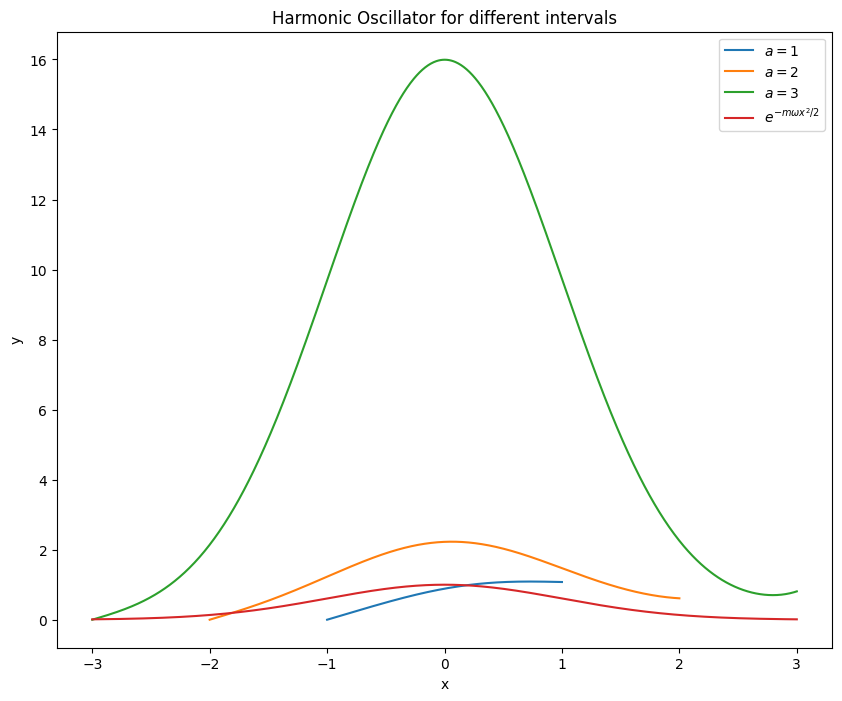

In [30]:
fig,ax = plt.subplots(figsize=(10, 8))
for a_start in range(1,4):
    X4,dP4,P4 = RK4_solver(psi_a,d_psi_a,-a_start,a_start,V2,E_0,m)
    ax.plot(X4,P4, label = f"$a = {a_start}$")
    if a_start == 3:
        Y4 = np.e**(-m * w* X4**2 /2)
        ax.plot(X4,Y4, label = "$e^{{-m \omega x^2/2}}$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Harmonic Oscillator for different intervals")
ax.legend()
plt.savefig("harmonic_oscillator_2.png")
plt.show()

Finding the interval for the ground state by requireing that the endpoint is close to zero:

In [42]:
a_boundary = np.linspace(1,10,10000)
stored_final_values = np.zeros(len(a_boundary))

for i in range(0,len(stored_final_values)):
    X5,dP5,P5 = RK4_solver(psi_a,d_psi_a,-a_boundary[i],a_boundary[i],V2,E_0,m)
    stored_final_values[i] = P5[-1]

solution = min(stored_final_values)
coordinate = np.where(stored_final_values == solution)
optimal_a = a_boundary[coordinate]
print("Optimal a is:")
print(optimal_a)

Optimal a is:
[2.54275428]


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\o'
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2843211609.py:5: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(X6,P6, label = f"$\psi(x)$, a = {optimal_a[0]}")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2843211609.py:6: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(X6,Y6, label = "$e^{{-m \omega x^2/2}}$")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2899846172.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi_points[i] = phi
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2899846172.py:31: DeprecationWarning: Conversion o

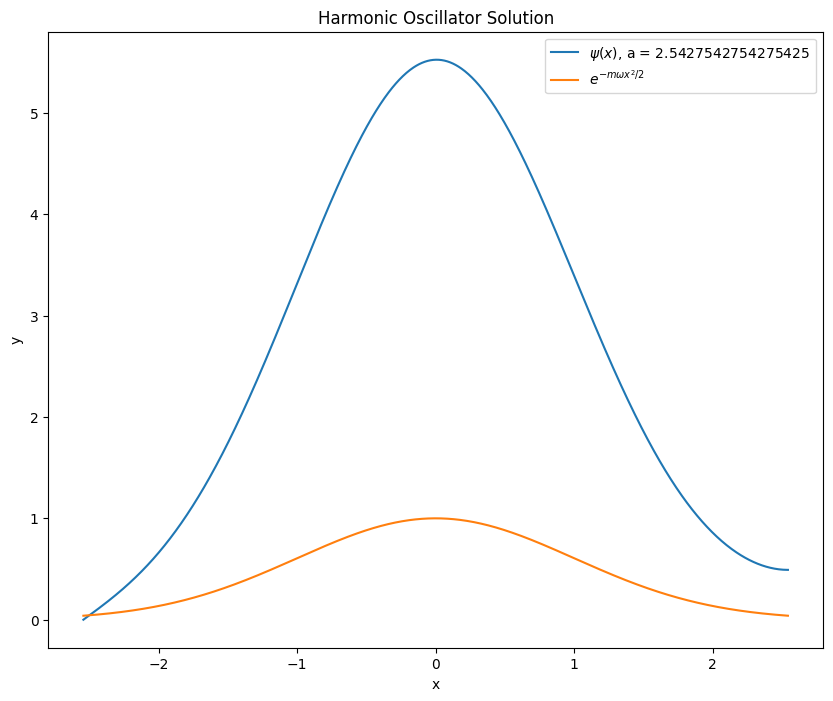

In [43]:
#Plot
X6,dP6,P6 = RK4_solver(psi_a,d_psi_a,-optimal_a,optimal_a,V2,E_0,m)
fig,ax = plt.subplots(figsize=(10, 8))
Y6 = np.e**(-m * w* X6**2 /2)
ax.plot(X6,P6, label = f"$\psi(x)$, a = {optimal_a[0]}")
ax.plot(X6,Y6, label = "$e^{{-m \omega x^2/2}}$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Harmonic Oscillator Solution")
ax.legend()
plt.savefig("harmonic_oscillator_3.png")
plt.show()

In [44]:
print("The numerical solution reproduces the ground state the best for:")
print(optimal_a[0])

The numerical solution reproduces the ground state the best for:
2.5427542754275425


What happens to the solution wave function as you change the energy?

<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2229608846.py:6: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(X7,P7, label = f"$E = {i} \omega $")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2899846172.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi_points[i] = phi
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2899846172.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  psi_points[i] = psi


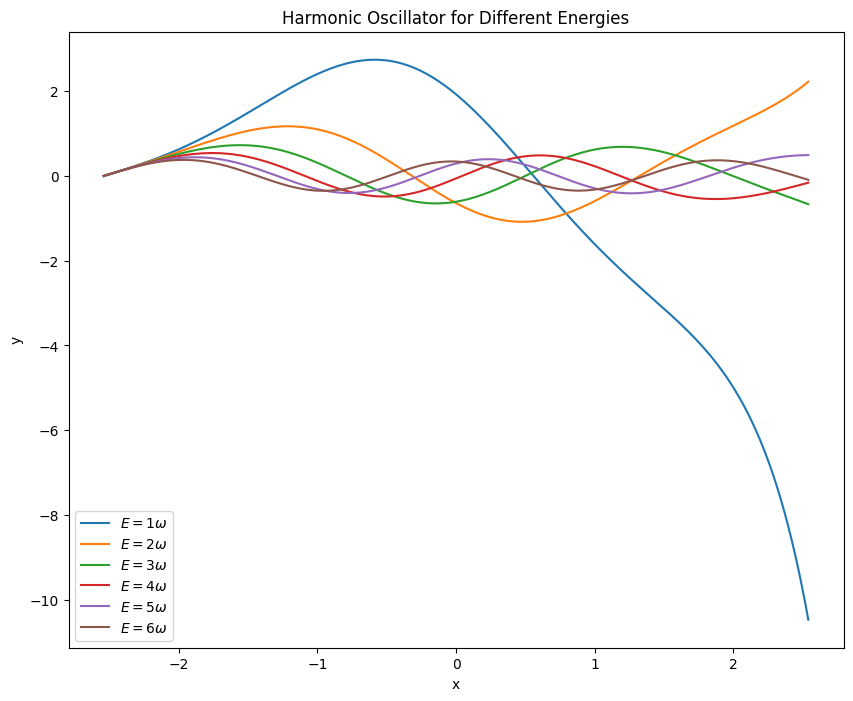

In [47]:
#Plots for different energies

fig,ax = plt.subplots(figsize=(10, 8))
for i in range(1,7):
    X7,dP7,P7 = RK4_solver(psi_a,d_psi_a,-optimal_a,optimal_a,V2,w*i,m)
    ax.plot(X7,P7, label = f"$E = {i} \omega $")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Harmonic Oscillator for Different Energies")
ax.legend()
plt.savefig("harmonic_oscillator_5.png")
plt.show()

Using wrong energy produces a divergent solution.

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/3241725242.py:5: SyntaxWarning: invalid escape sequence '\o'
  ax.plot(X7,P7, label = f"$E = {1+2*i}/2 \omega $")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2899846172.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi_points[i] = phi
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2899846172.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  psi_points[i] = psi


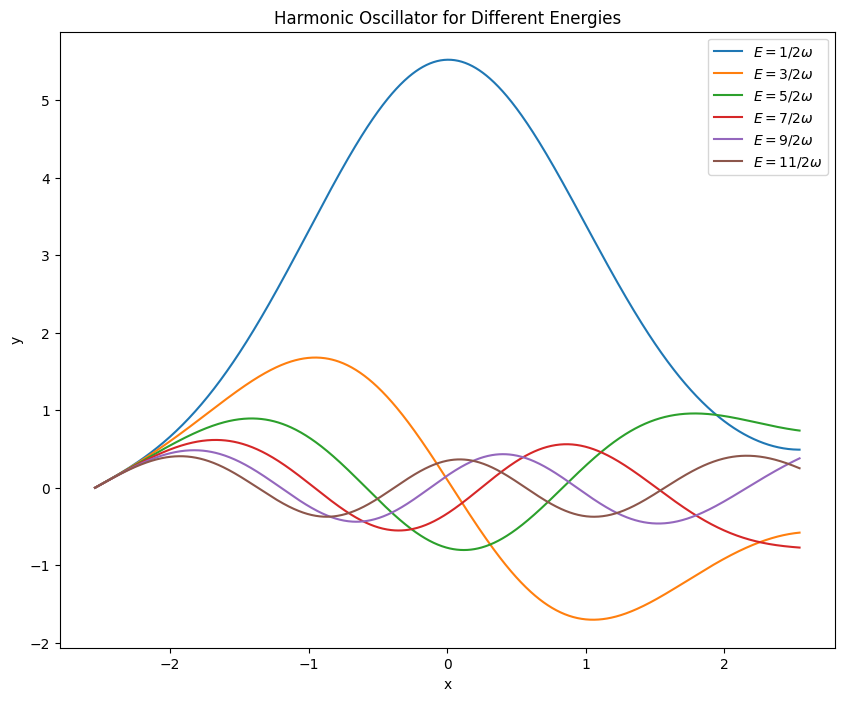

In [ ]:
#Plots for eigen energies
fig,ax = plt.subplots(figsize=(10, 8))
for i in range(0,6):
    X7,dP7,P7 = RK4_solver(psi_a,d_psi_a,-optimal_a,optimal_a,V2,w*(1+2*i)/2,m)
    ax.plot(X7,P7, label = f"$E = {1+2*i}/2 \omega $")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Harmonic Oscillator for Different Energies")
ax.legend()
plt.savefig("harmonic_oscillator_4.png")
plt.show()

The energy values $\omega/2, 3*\omega/2,$ etc. are special, because they are the energy eigenvalues, and the numerical solutions should be proportional to the known exact solutions for the harmonic oscillator. We obsereve that each subsequent higher energy level has more harmonics fitting in the interval. There is some disrepance at the ends of the interval, but that is because the wave function for harmonic oscillator has a non-zero value outside the interval $[-a,a]$. Thus, it does not exactly have a zero value at $x=-a$, leading to a slightly different solution.

## 2. The Shooting Method

Function that numerically solves Schrödinger Equation for a given energy $E$ over the domain
$[a,b]$ and returns $\Psi(b)$.

In [53]:
#Setting mass to 1 for simplification
m = 1

def Psi_b_solver(E,a,b,V):
    """
    Function that numerically solves Schrödinger Equation for a given energy E over the domain [a,b],
    and returns the solution at the end of the interval, Psi(b)
    
    :param E: float, energy
    :param a: float, interval starting point
    :param b: float, interval end point
    :param V: function, potential
    """
    X_sol,dP_sol,P_sol = RK4_solver(0,1,a,b,V,E,m)
    Psi_b_E = P_sol[-1]
    return Psi_b_E 

<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/1220272698.py:9: SyntaxWarning: invalid escape sequence '\P'
  ax.set_ylabel("$\Psi(b;E)$")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/1220272698.py:10: SyntaxWarning: invalid escape sequence '\P'
  ax.set_title("$\Psi(b;E)$ VS $E$")
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2899846172.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi_points[i] = phi
/var/folders/bg/5qsr84rd5gv3r39k5v2x0mm00000gn/T/ipykernel_3408/2899846172.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is 

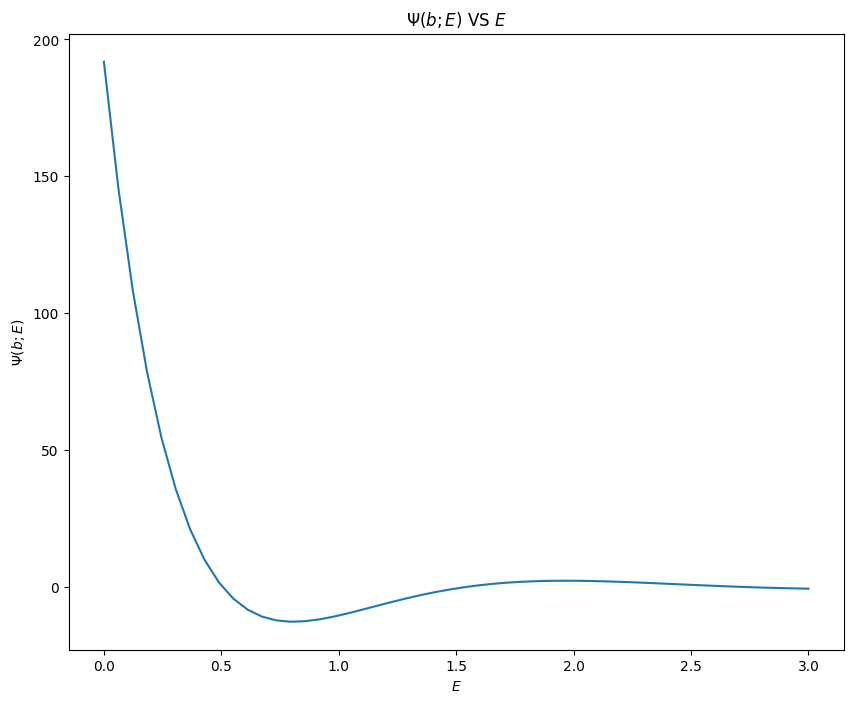

In [52]:
w = 1 
E_values = np.linspace(0,3*w)
Psi_b_values = np.zeros(len(E_values))
for i in range(0,len(Psi_b_values)):
    Psi_b_values[i] = Psi_b_solver(E_values[i],-optimal_a,optimal_a,V2)
fig,ax = plt.subplots(figsize=(10, 8))
ax.plot(E_values,Psi_b_values)
ax.set_xlabel("$E$")
ax.set_ylabel("$\Psi(b;E)$")
ax.set_title("$\Psi(b;E)$ VS $E$")
plt.savefig("Endpoint_VS_Energy.png")
plt.show()

$\Psi(b)$ = 0 boundray condition. 

Function that uses bisection to find a root of $g(E) = \Psi(b; E)$ on the test interval $[E_{begin},E_{end}]$.

In [56]:
def bisection_solver(a,b,V, E_begining,E_end):
    """
    Function that uses bisection to find a root of Psi(b; E) on the test interval [E_{begin},E_{end}]

    :param a: float, wave function interval starting point
    :param b: float, wave function interval end point
    :param V: function, potential
    :param E_beging: float, energy interval start point
    :param E_end: float, energy interval end point
    """

    error = 10**(-14)

    if Psi_b_solver(E_begining,a,b,V) * Psi_b_solver(E_end,a,b,V) >= 0:
        raise ValueError("Values must have opposite signs")

    for i in range(0,100):
        E_middle = (E_begining + E_end) / 2

        if abs(Psi_b_solver(E_middle,a,b,V)) < error or (E_end - E_begining) / 2 < error:
            return E_middle
        if Psi_b_solver(E_begining,a,b,V) *  Psi_b_solver(E_middle,a,b,V)< 0:
            E_end = E_middle
        else:
            E_begining = E_middle
    
    return E_middle

In [59]:
#Particle in a box test

bisection_solver(0,10,V1, 4,6)

5.983070963954219